# Assignment 3

### Patrick Pfenning

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# pull data
kpi = pd.read_csv('../data/kpisetting.csv')
kpi['date'] = pd.to_datetime(kpi['date'])
kpi = kpi.set_index('date', drop=True)
kpi.head()

,visitors,downloads,installations,28dactive
date,,,,
2015-01-14,16489,1826,570,270
2015-01-15,16362,936,266,104
2015-01-16,16463,188,61,67
2015-01-17,15972,474,112,40
2015-01-18,16659,186,109,32


In [3]:
# get X, y
y = kpi.installations
X = kpi[['visitors', 'downloads', '28dactive']]


In [4]:
from dataclasses import dataclass
import seaborn as sns
import scipy.stats as stats

@dataclass
class LM:

    X: pd.DataFrame
    y: pd.Series
    test_size: float = 0.2
    random_state: int = 42

    def __post_init__(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X,
            self.y,
            test_size=self.test_size,
            random_state=self.random_state
        )

        self.regr = LinearRegression()
        self.regr.fit(self.X_train, self.y_train)
        self.pred = self.regr.predict(self.X_test)

    @staticmethod
    def __capitalize(string):
        return string[0].upper() + string[1:]


    def __lin_plot(self):
        plt.scatter(self.X_test, self.y_test, color="black")
        plt.plot(self.X_test, self.pred, color="blue", linewidth=3)

        xlab = self.__capitalize(self.X.columns[0])
        ylab = self.__capitalize(self.y.name)

        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.title(f"{ylab} vs. {xlab}")

        plt.show()

    def __resid_plot(self):
        sns.residplot(x=self.X_test, y=self.y_test, lowess=True, line_kws={'color': 'red'}, color='green')
        plt.show()

    def __prod_plot(self):
        stats.probplot(self.y_test - self.pred, plot=plt)
        plt.show()

    def plotter(self):
        self.__lin_plot()
        self.__resid_plot()
        self.__prod_plot()

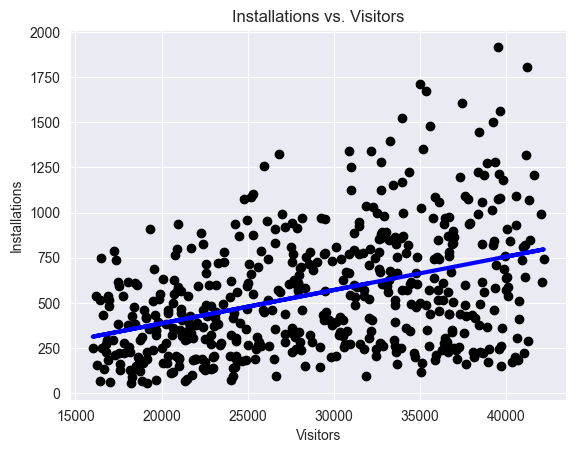

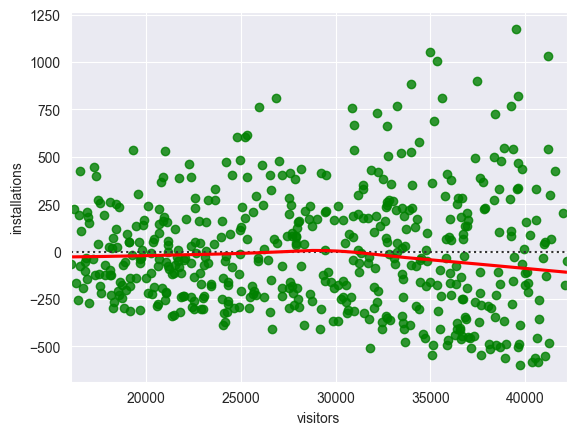

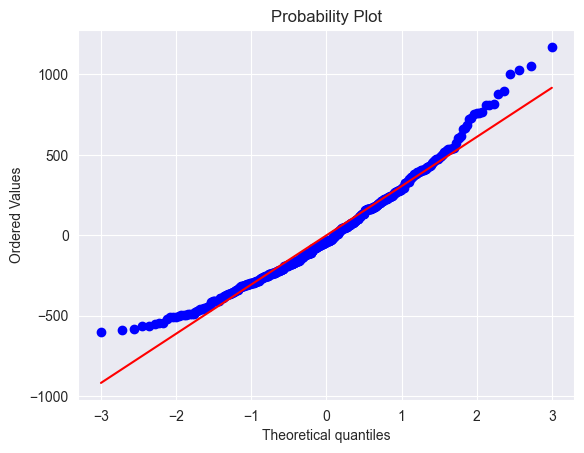

In [5]:
visitors = LM(X[['visitors']], y)
visitors.plotter()

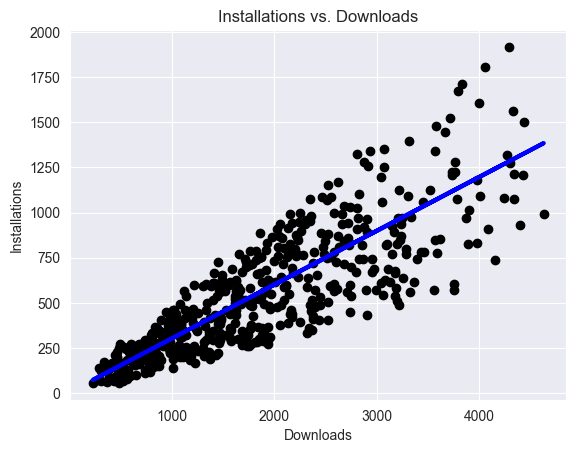

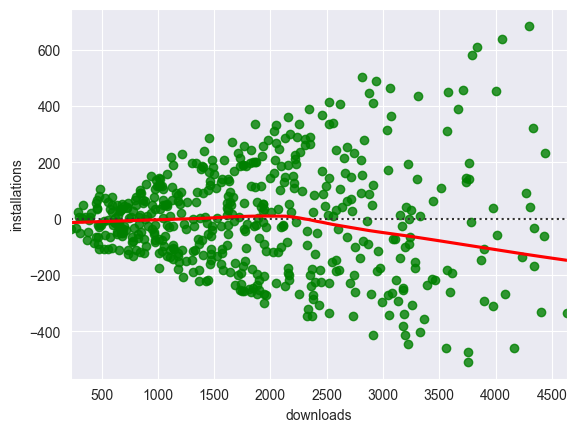

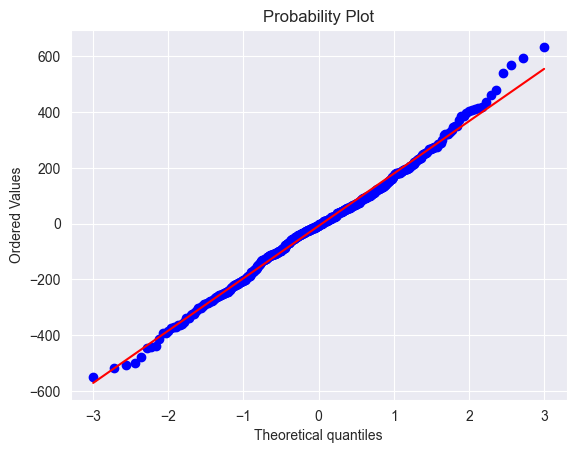

In [6]:
downloads = LM(X[['downloads']], y)
downloads.plotter()

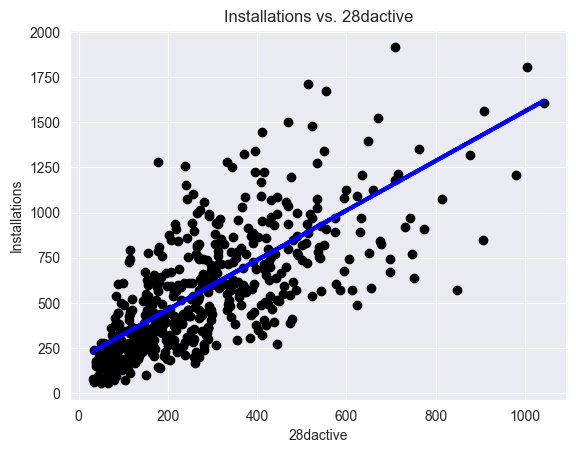

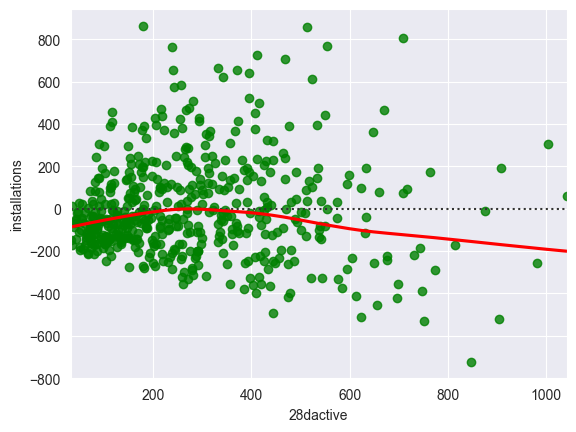

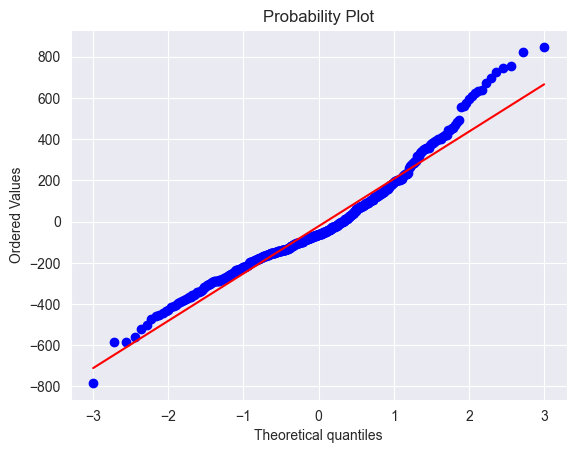

In [7]:
d28 = LM(X[['28dactive']], y)
d28.plotter()